# Генерация перестановок
Для простоты можно считать, что множество переставляемых элементов - это просто множество целых чисел от 1 до n (более общую задачу генерации перестановок элементов `{a_1, a_2, ..., a_n}` можно свести к перестановке индексов).

*Применение метода уменьшения размера:*  
пусть у нас есть (n-1)! перестановка для множества {1, ..., n-1}. Чтобы получить решение для множества {1, ..., n}, нужно вставить число n в каждую из n возможных позиций среди элементов каждой перестановки (n новых перестановок на каждую из (n-1)! известных перестановок). Тогда получим $n*(n-1)!=n!$ перестановок б**о**льшего множества.  
**Замечание**: вставка числа n осуществляется справа налево, затем слева направо, и так чередуясь (такой порядок генерации удовлетворяет требованию *минимальных изменений*: каждая новая перестановка получается из предыдущей путем одного обмена местами двух элементов).
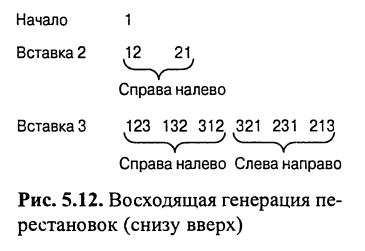

In [1]:
def permutations(list_with_elem):
    if len(list_with_elem) == 1:
        return [list_with_elem]
    new_element = list_with_elem[-1]
    perms_for_reduce = permutations(list_with_elem[:-1])
    length_of_reduce = len(perms_for_reduce[0])
    result = []
    flag = -1
    for p in perms_for_reduce:
        for i in range(len(p)+1):
            result.append(p[:i] + [new_element] + p[i:])
    return result

In [2]:
permutations([1,2,3])

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]

Другой подход: **алгоритм Джонсона-Троттера**  
Свяжем с каждым элементом направление, которое связано с порядком.
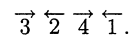
Компонент k называется *мобильным*, если стрелка указывает на меньшее соседнее число (компоненты 3 и 4).  
Алгоритм:  
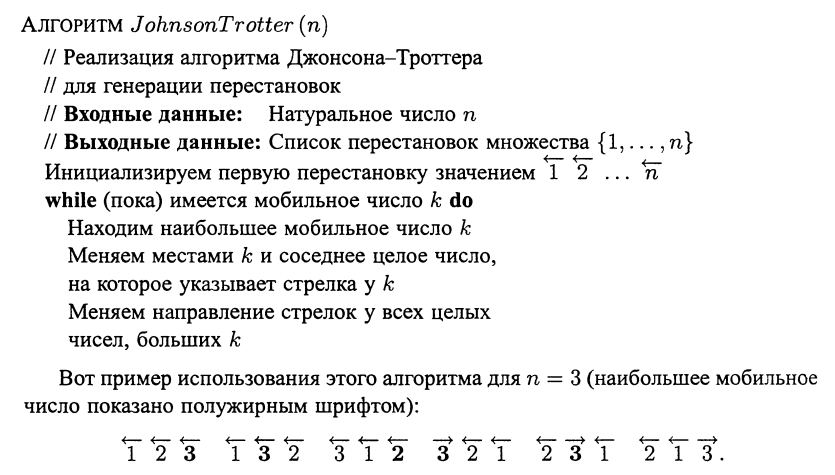

# Генерация подмножеств
Пусть есть множество абстрактных объектов `A=[a_1, a_2, ..., a_n]`. Требуется сгенерировать **абстрактное множество** (**power set**) - множество всех подмножеств (его мощность $2^n$).


Метод уменьшения задачи на константу  
Все подмножества `A=[a_1, a_2, ..., a_n]` можно разделить на 2 группы:  
- Первая группа - все подмножества `A=[a_1, ..., a_n-1]`
- Вторая группа состоит из подмножеств первой группы, объединенных с элементом `a_n`

Таким образом, если есть список подмножеств *меньшего* множества `A=[a_1, ..., a_n-1]`, то можно получить список подмножеств исходного множества путем добавления к имеющемуся списку все его элемента с добавленным `a_n`

Применение к `A=[a_1, a_2, a_3]` :
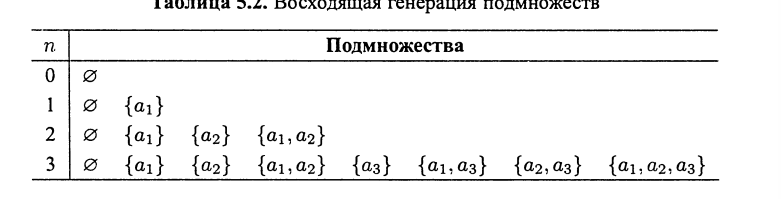

In [17]:
def generate_power_set(A):
    n = len(A)
    if n < 2:
        return [ [], [A[0]] ]
    a_n = A[-1]
    power_set_reduce = generate_power_set(A[:-1])
    result = []
    for elem in power_set_reduce:
        result.append(elem)
        result.append(elem+[a_n])
    return result

In [21]:
example = ['One', 'Two', 'Three', 'Four']
checking  = generate_power_set(example)
print(f'2^{len(example)}={len(checking)}')
for elem in checking:
    print(elem)

2^4=16
[]
['Four']
['Three']
['Three', 'Four']
['Two']
['Two', 'Four']
['Two', 'Three']
['Two', 'Three', 'Four']
['One']
['One', 'Four']
['One', 'Three']
['One', 'Three', 'Four']
['One', 'Two']
['One', 'Two', 'Four']
['One', 'Two', 'Three']
['One', 'Two', 'Three', 'Four']
